In [6]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

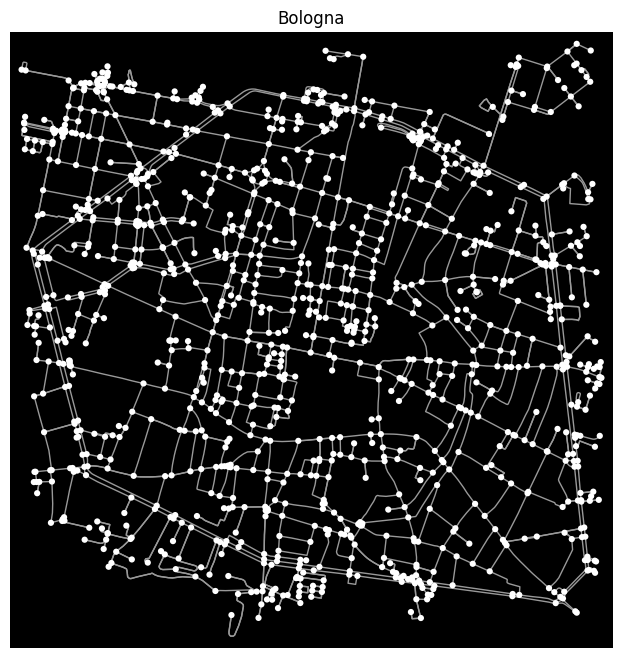

In [7]:
location_point = (44.495555, 11.3428)

# create network from point, inside bounding box of N, S, E, W each 750m from point
G = ox.graph_from_point(location_point, dist=1300, dist_type='bbox', network_type='drive_service')
G = ox.project_graph(G)
osmids = list(G.nodes)
G = nx.relabel.convert_node_labels_to_integers(G)

# give each node its original osmid as attribute since we relabeled them
osmid_values = {k: v for k, v in zip(G.nodes, osmids)}
nx.set_node_attributes(G, osmid_values, "osmid")


fig, ax = ox.plot.plot_graph(G, bgcolor='black',node_size=20, node_color='white', show=False)
plt.axis('on')
plt.title('Bologna')
plt.show()


In [8]:
#connectivity analysis
n_edges = G.number_of_edges()
n_nodes = G.number_of_nodes()

#meshedness coefficient
alpha = (n_edges - n_nodes + 1) / (2 * n_nodes - 5)

#connectivity
beta = n_edges/n_nodes

# gammaindex is a measure of the relation between the real number of edges and the number of all possible edges in a network
gamma = n_edges/(3*(n_nodes-2))

#characteristic path length
#l_geo = nx.average_shortest_path_length(G)

#print results
print(n_edges)
print(n_nodes)
print("meshedness coefficient:", alpha)
print("beta connectivity:", beta)
print("gamma index", gamma)
#print("characteristic path length:", l_geo)


2113
1164
meshedness coefficient: 0.4089539388721481
beta connectivity: 1.8152920962199313
gamma index 0.6061388410786002


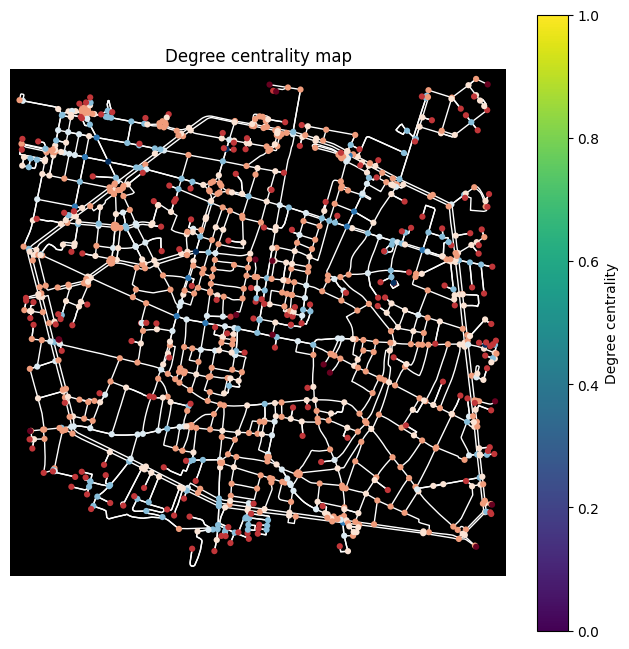

In [9]:
# compute degree centrality
degree_centrality = nx.degree_centrality(G)

dc_values = np.array([degree_centrality[node] for node in G.nodes])

# normalize 
norm_dc_values = (dc_values - min(dc_values)) / (max(dc_values) - min(dc_values))

# Plot the graph with a heatmap based on degree centrality
fig, ax = ox.plot_graph(
    G,
    bgcolor='black',
    node_size=20,
    node_color=plt.cm.RdBu(norm_dc_values),  # Utilizza la colormap "seismic"
    edge_color='white',
    show=False
)

# Aggiungi una barra dei colori con l'asse specificato (ax)
cbar = plt.colorbar(ax.collections[0], ax=ax, label='Degree centrality')

plt.axis('on')
plt.title('Degree centrality map')
plt.show()

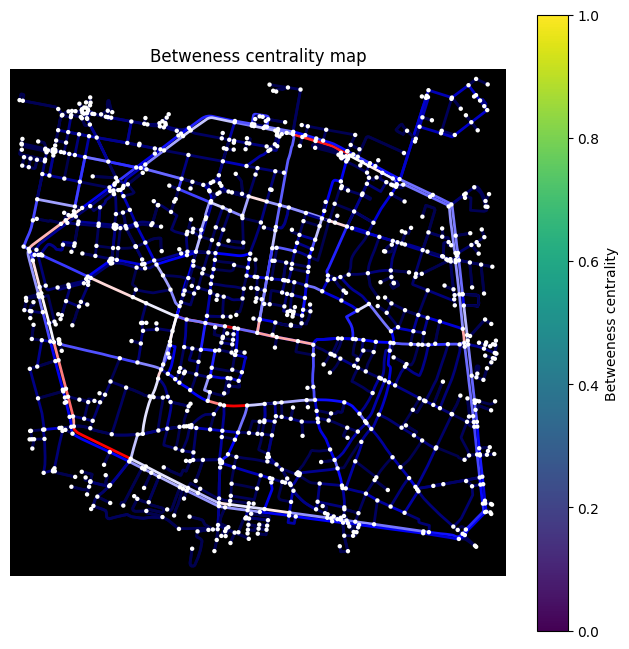

In [10]:
# compute betweness centrality
edge_betweenness_centrality = nx.edge_betweenness_centrality(G)

ebc_values = np.array([edge_betweenness_centrality[edge] for edge in G.edges])

#normalize
norm_ebc_values = (ebc_values - min(ebc_values)) / (max(ebc_values) - min(ebc_values))

# Plot
fig, ax = ox.plot_graph(
    G,
    bgcolor='black',
    node_size=10,
    edge_color=plt.cm.seismic(norm_ebc_values),  
    edge_linewidth=2, 
    show=False
)

# Color bar
cbar = plt.colorbar(ax.collections[0], ax=ax, label='Betweeness centrality')

plt.axis('on')
plt.title('Betweness centrality map')
plt.show()